In [260]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import nltk
from nltk.corpus import stopwords
import langdetect 
from langdetect import detect

## Import cases/test/death data and published papers data 

In [237]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [256]:
url = 'https://raw.githubusercontent.com/nicholasmfraser/covid19_preprints/master/data/covid19_preprints.csv'
paper_df = pd.read_csv(url, error_bad_lines=False)

## Exploration of the published paper data 

In [257]:
paper_df.head(10)

,source,doi,arxiv_id,posted_date,title,abstract
0,AfricArXiv (OSF),10.31730/osf.io/e7bk4,NaN,2020-04-02,"ACE-2 in the highlight of COVID-19, A proposed...",<p>Pneumonia caused by the novel corona virus ...
1,AfricArXiv (OSF),10.31730/osf.io/b7eqj,NaN,2020-04-28,Covid-19 et handicap mental/Autisme et autres ...,<p>The Covid-19 is challenging our health syst...
2,AfricArXiv (OSF),10.31730/osf.io/65b8f,NaN,2020-05-02,Ghana’s Preparedness Now and For Future Pandemics,<p>The future of nations in the face of the ra...
3,AfricArXiv (OSF),10.31730/osf.io/sw6g2,NaN,2020-04-30,PSYCHOLOGICAL DISTRESS EXPERIENCES OF NIGERIAN...,<p>This study examined the psychological distr...
4,AfricArXiv (OSF),10.31730/osf.io/sy54p,NaN,2020-03-10,THE CAUSE OF PANIC AT THE OUTBREAK OF COVID-19...,<p>Lack of proper messaging at an outbreak of ...
5,bioRxiv,10.1101/2020.04.05.026187,NaN,2020-04-05,“Amantadine disrupts lysosomal gene expression...,<jats:title>Abstract</jats:title><jats:p>SARS-...
6,bioRxiv,10.1101/2020.04.20.050088,NaN,2020-04-20,“Identification and enrichment of SECReTE cis-...,<jats:title>Abstract</jats:title><jats:p><jats...
7,bioRxiv,10.1101/2020.01.24.919159,NaN,2020-01-25,2019-20 Wuhan coronavirus outbreak: Intense su...,<jats:title>ABSTRACT</jats:title><jats:p>The o...
8,bioRxiv,10.1101/2020.04.14.041319,NaN,2020-04-17,A blueprint for the implementation of a valida...,<jats:title>Abstract</jats:title><jats:p>The C...
9,bioRxiv,10.1101/2020.04.28.051789,NaN,2020-04-29,A collection of designed peptides to target SA...,<jats:title>Abstract</jats:title><jats:p>The a...


In [258]:
paper_df['title'] = paper_df['title'].str.lower()

In [259]:
paper_df.head(10)

,source,doi,arxiv_id,posted_date,title,abstract
0,AfricArXiv (OSF),10.31730/osf.io/e7bk4,NaN,2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",<p>Pneumonia caused by the novel corona virus ...
1,AfricArXiv (OSF),10.31730/osf.io/b7eqj,NaN,2020-04-28,covid-19 et handicap mental/autisme et autres ...,<p>The Covid-19 is challenging our health syst...
2,AfricArXiv (OSF),10.31730/osf.io/65b8f,NaN,2020-05-02,ghana’s preparedness now and for future pandemics,<p>The future of nations in the face of the ra...
3,AfricArXiv (OSF),10.31730/osf.io/sw6g2,NaN,2020-04-30,psychological distress experiences of nigerian...,<p>This study examined the psychological distr...
4,AfricArXiv (OSF),10.31730/osf.io/sy54p,NaN,2020-03-10,the cause of panic at the outbreak of covid-19...,<p>Lack of proper messaging at an outbreak of ...
5,bioRxiv,10.1101/2020.04.05.026187,NaN,2020-04-05,“amantadine disrupts lysosomal gene expression...,<jats:title>Abstract</jats:title><jats:p>SARS-...
6,bioRxiv,10.1101/2020.04.20.050088,NaN,2020-04-20,“identification and enrichment of secrete cis-...,<jats:title>Abstract</jats:title><jats:p><jats...
7,bioRxiv,10.1101/2020.01.24.919159,NaN,2020-01-25,2019-20 wuhan coronavirus outbreak: intense su...,<jats:title>ABSTRACT</jats:title><jats:p>The o...
8,bioRxiv,10.1101/2020.04.14.041319,NaN,2020-04-17,a blueprint for the implementation of a valida...,<jats:title>Abstract</jats:title><jats:p>The C...
9,bioRxiv,10.1101/2020.04.28.051789,NaN,2020-04-29,a collection of designed peptides to target sa...,<jats:title>Abstract</jats:title><jats:p>The a...


In [262]:
paper_df['language'] = paper_df['title'].apply(detect)

In [263]:
paper_df.head()

,source,doi,arxiv_id,posted_date,title,abstract,language
0,AfricArXiv (OSF),10.31730/osf.io/e7bk4,NaN,2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",<p>Pneumonia caused by the novel corona virus ...,en
1,AfricArXiv (OSF),10.31730/osf.io/b7eqj,NaN,2020-04-28,covid-19 et handicap mental/autisme et autres ...,<p>The Covid-19 is challenging our health syst...,fr
2,AfricArXiv (OSF),10.31730/osf.io/65b8f,NaN,2020-05-02,ghana’s preparedness now and for future pandemics,<p>The future of nations in the face of the ra...,en
3,AfricArXiv (OSF),10.31730/osf.io/sw6g2,NaN,2020-04-30,psychological distress experiences of nigerian...,<p>This study examined the psychological distr...,en
4,AfricArXiv (OSF),10.31730/osf.io/sy54p,NaN,2020-03-10,the cause of panic at the outbreak of covid-19...,<p>Lack of proper messaging at an outbreak of ...,en


In [268]:
paper_df['language'].value_counts()

en    7081
es      80
it      63
pt      48
fr      21
id      21
ro      12
ca      12
de      10
vi       8
ru       6
da       3
uk       3
bg       3
et       2
pl       1
af       1
sq       1
hr       1
tr       1
cy       1
nl       1
Name: language, dtype: int64

In [269]:
paper_df = paper_df[paper_df['language'] == 'en']

In [279]:
nltk.download('punkt')
def identify_tokens(row):
    review = row['title']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

paper_df['words'] = paper_df.apply(identify_tokens, axis=1)

[nltk_data] Downloading package punkt to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [272]:
paper_df.head(10)

,source,doi,arxiv_id,posted_date,title,abstract,language,words
0,AfricArXiv (OSF),10.31730/osf.io/e7bk4,NaN,2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",<p>Pneumonia caused by the novel corona virus ...,en,"[in, the, highlight, of, a, proposed, patholog..."
2,AfricArXiv (OSF),10.31730/osf.io/65b8f,NaN,2020-05-02,ghana’s preparedness now and for future pandemics,<p>The future of nations in the face of the ra...,en,"[ghana, s, preparedness, now, and, for, future..."
3,AfricArXiv (OSF),10.31730/osf.io/sw6g2,NaN,2020-04-30,psychological distress experiences of nigerian...,<p>This study examined the psychological distr...,en,"[psychological, distress, experiences, of, nig..."
4,AfricArXiv (OSF),10.31730/osf.io/sy54p,NaN,2020-03-10,the cause of panic at the outbreak of covid-19...,<p>Lack of proper messaging at an outbreak of ...,en,"[the, cause, of, panic, at, the, outbreak, of,..."
5,bioRxiv,10.1101/2020.04.05.026187,NaN,2020-04-05,“amantadine disrupts lysosomal gene expression...,<jats:title>Abstract</jats:title><jats:p>SARS-...,en,"[amantadine, disrupts, lysosomal, gene, expres..."
6,bioRxiv,10.1101/2020.04.20.050088,NaN,2020-04-20,“identification and enrichment of secrete cis-...,<jats:title>Abstract</jats:title><jats:p><jats...,en,"[identification, and, enrichment, of, secrete,..."
7,bioRxiv,10.1101/2020.01.24.919159,NaN,2020-01-25,2019-20 wuhan coronavirus outbreak: intense su...,<jats:title>ABSTRACT</jats:title><jats:p>The o...,en,"[wuhan, coronavirus, outbreak, intense, survei..."
8,bioRxiv,10.1101/2020.04.14.041319,NaN,2020-04-17,a blueprint for the implementation of a valida...,<jats:title>Abstract</jats:title><jats:p>The C...,en,"[a, blueprint, for, the, implementation, of, a..."
9,bioRxiv,10.1101/2020.04.28.051789,NaN,2020-04-29,a collection of designed peptides to target sa...,<jats:title>Abstract</jats:title><jats:p>The a...,en,"[a, collection, of, designed, peptides, to, ta..."
10,bioRxiv,10.1101/2020.04.10.036335,NaN,2020-04-12,a computational approach to design potential s...,<jats:title>ABSTRACT</jats:title><jats:p>An ou...,en,"[a, computational, approach, to, design, poten..."


In [273]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

def stem_list(row):
    my_list = row['words']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

paper_df['stemmed_words'] = paper_df.apply(stem_list, axis=1)

In [274]:
paper_df.head()

,source,doi,arxiv_id,posted_date,title,abstract,language,words,stemmed_words
0,AfricArXiv (OSF),10.31730/osf.io/e7bk4,NaN,2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",<p>Pneumonia caused by the novel corona virus ...,en,"[in, the, highlight, of, a, proposed, patholog...","[in, the, highlight, of, a, propos, patholog, ..."
2,AfricArXiv (OSF),10.31730/osf.io/65b8f,NaN,2020-05-02,ghana’s preparedness now and for future pandemics,<p>The future of nations in the face of the ra...,en,"[ghana, s, preparedness, now, and, for, future...","[ghana, s, prepared, now, and, for, futur, pan..."
3,AfricArXiv (OSF),10.31730/osf.io/sw6g2,NaN,2020-04-30,psychological distress experiences of nigerian...,<p>This study examined the psychological distr...,en,"[psychological, distress, experiences, of, nig...","[psycholog, distress, experi, of, nigerian, am..."
4,AfricArXiv (OSF),10.31730/osf.io/sy54p,NaN,2020-03-10,the cause of panic at the outbreak of covid-19...,<p>Lack of proper messaging at an outbreak of ...,en,"[the, cause, of, panic, at, the, outbreak, of,...","[the, caus, of, panic, at, the, outbreak, of, ..."
5,bioRxiv,10.1101/2020.04.05.026187,NaN,2020-04-05,“amantadine disrupts lysosomal gene expression...,<jats:title>Abstract</jats:title><jats:p>SARS-...,en,"[amantadine, disrupts, lysosomal, gene, expres...","[amantadin, disrupt, lysosom, gene, express, p..."


In [275]:
nltk.download('stopwords')
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['stemmed_words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

paper_df['stem_meaningful'] = paper_df.apply(remove_stops, axis=1)

[nltk_data] Downloading package stopwords to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [276]:
paper_df.head()

,source,doi,arxiv_id,posted_date,title,abstract,language,words,stemmed_words,stem_meaningful
0,AfricArXiv (OSF),10.31730/osf.io/e7bk4,NaN,2020-04-02,"ace-2 in the highlight of covid-19, a proposed...",<p>Pneumonia caused by the novel corona virus ...,en,"[in, the, highlight, of, a, proposed, patholog...","[in, the, highlight, of, a, propos, patholog, ...","[highlight, propos, patholog, potenti, correl]"
2,AfricArXiv (OSF),10.31730/osf.io/65b8f,NaN,2020-05-02,ghana’s preparedness now and for future pandemics,<p>The future of nations in the face of the ra...,en,"[ghana, s, preparedness, now, and, for, future...","[ghana, s, prepared, now, and, for, futur, pan...","[ghana, prepared, futur, pandem]"
3,AfricArXiv (OSF),10.31730/osf.io/sw6g2,NaN,2020-04-30,psychological distress experiences of nigerian...,<p>This study examined the psychological distr...,en,"[psychological, distress, experiences, of, nig...","[psycholog, distress, experi, of, nigerian, am...","[psycholog, distress, experi, nigerian, amid, ..."
4,AfricArXiv (OSF),10.31730/osf.io/sy54p,NaN,2020-03-10,the cause of panic at the outbreak of covid-19...,<p>Lack of proper messaging at an outbreak of ...,en,"[the, cause, of, panic, at, the, outbreak, of,...","[the, caus, of, panic, at, the, outbreak, of, ...","[caus, panic, outbreak, south, africa, compar,..."
5,bioRxiv,10.1101/2020.04.05.026187,NaN,2020-04-05,“amantadine disrupts lysosomal gene expression...,<jats:title>Abstract</jats:title><jats:p>SARS-...,en,"[amantadine, disrupts, lysosomal, gene, expres...","[amantadin, disrupt, lysosom, gene, express, p...","[amantadin, disrupt, lysosom, gene, express, p..."


## Exploration of the tests data 

#### Keep only countries that conduct tests

In [16]:
tests_df = df[df.isnull()['total_tests']==False]

In [129]:
currents_deaths_df = tests_df.groupby('location')['total_deaths'].max().reset_index()

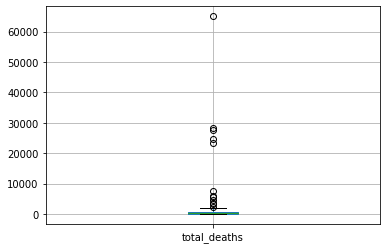

In [132]:
currents_deaths_df.boxplot()

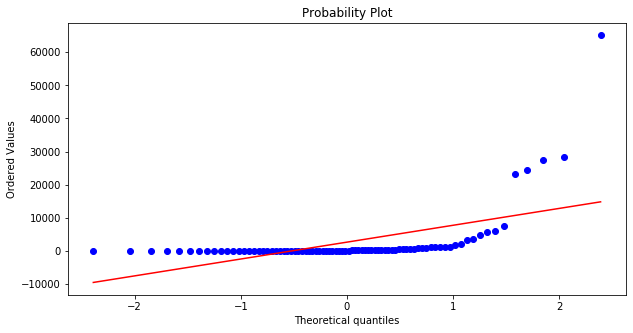

In [141]:
fig = plt.figure(figsize=(10,5))
res = stats.probplot(currents_deaths_df['total_deaths'], plot=plt)

In [153]:
countries_selected = currents_deaths_df[currents_deaths_df['total_deaths'] > 2000]['location'].reset_index().drop(['index'], axis = 1)

In [154]:
countries_selected

,location
0,Belgium
1,Canada
2,France
3,Germany
4,Iran
5,Italy
6,Netherlands
7,Spain
8,Sweden
9,Turkey


In [155]:
tests_countries_df = tests_df.merge(countries_selected, how='inner', on='location')

In [157]:
len(tests_countries_df)

453

In [73]:
tests_df.loc[:, ['location','total_cases', 'total_deaths']] 

,location,total_cases,total_deaths
496,Argentina,1715,60
497,Argentina,1795,65
498,Argentina,1894,79
499,Argentina,1975,82
501,Argentina,2203,95
...,...,...,...
14722,Zimbabwe,31,4
14723,Zimbabwe,31,4
14724,Zimbabwe,32,4
14725,Zimbabwe,32,4


In [57]:
max_df = tests_df.groupby('location', as_index = 'False').max()

In [76]:
max_df.loc[:,['location', 'total_cases', 'total_deaths']].head(82)

,location,total_cases,total_deaths
0,Argentina,4415,218
1,Australia,6762,92
2,Austria,15558,596
3,Bahrain,3284,8
4,Bangladesh,7667,168
...,...,...,...
77,United Kingdom,177454,27510
78,United States,1103781,65068
79,Uruguay,652,17
80,Vietnam,270,0


In [58]:
country_tests = list(tests_df['location'].unique())

In [59]:
country_tests

['Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Belarus',
 'Bolivia',
 'Canada',
 'Switzerland',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Cuba',
 'Czech Republic',
 'Germany',
 'Denmark',
 'Ecuador',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'United Kingdom',
 'Ghana',
 'Greece',
 'Hong Kong',
 'Croatia',
 'Hungary',
 'Indonesia',
 'India',
 'Ireland',
 'Iran',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'South Korea',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Morocco',
 'Mexico',
 'Myanmar',
 'Malaysia',
 'Nigeria',
 'Netherlands',
 'Norway',
 'Nepal',
 'New Zealand',
 'Pakistan',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Paraguay',
 'Qatar',
 'Romania',
 'Russia',
 'Rwanda',
 'Senegal',
 'Singapore',
 'El Salvador',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Sweden',
 'Thailand',
 'Tunisia',
 'Turkey',
 'Taiwan',
 'Uganda',
 'Ukraine',
 'Uruguay',
 'United States',
 'Vietnam',
 'Sou

<Figure size 1440x720 with 0 Axes>

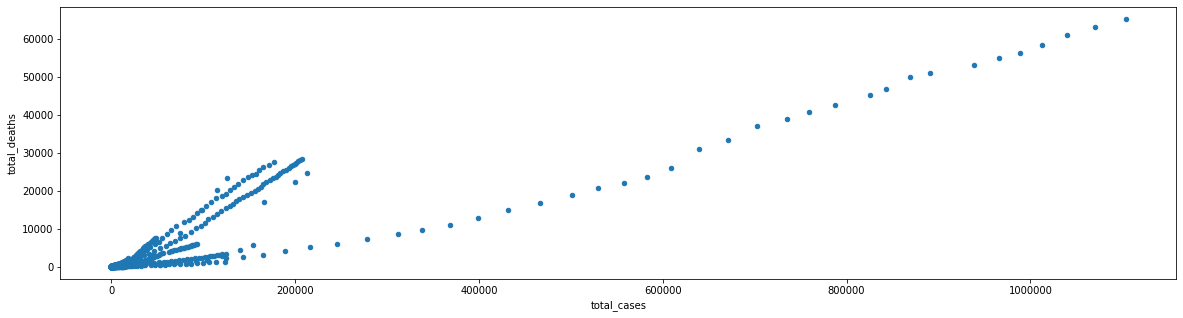

In [40]:
plt.figure(figsize = (20,10))
tests_df.plot.scatter(x = 'total_cases', y = 'total_deaths', figsize = (20,5))

<Figure size 1440x720 with 0 Axes>

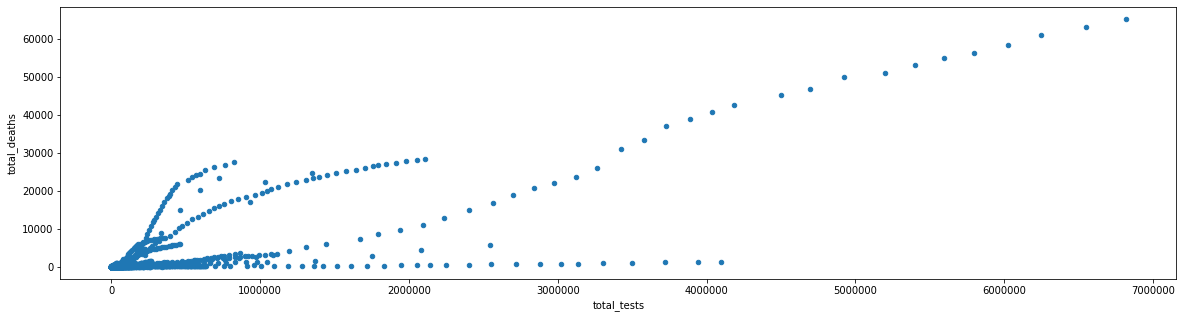

In [41]:
plt.figure(figsize = (20,10))
tests_df.plot.scatter(x = 'total_tests', y = 'total_deaths', figsize = (20,5))

In [42]:
import seaborn as sns

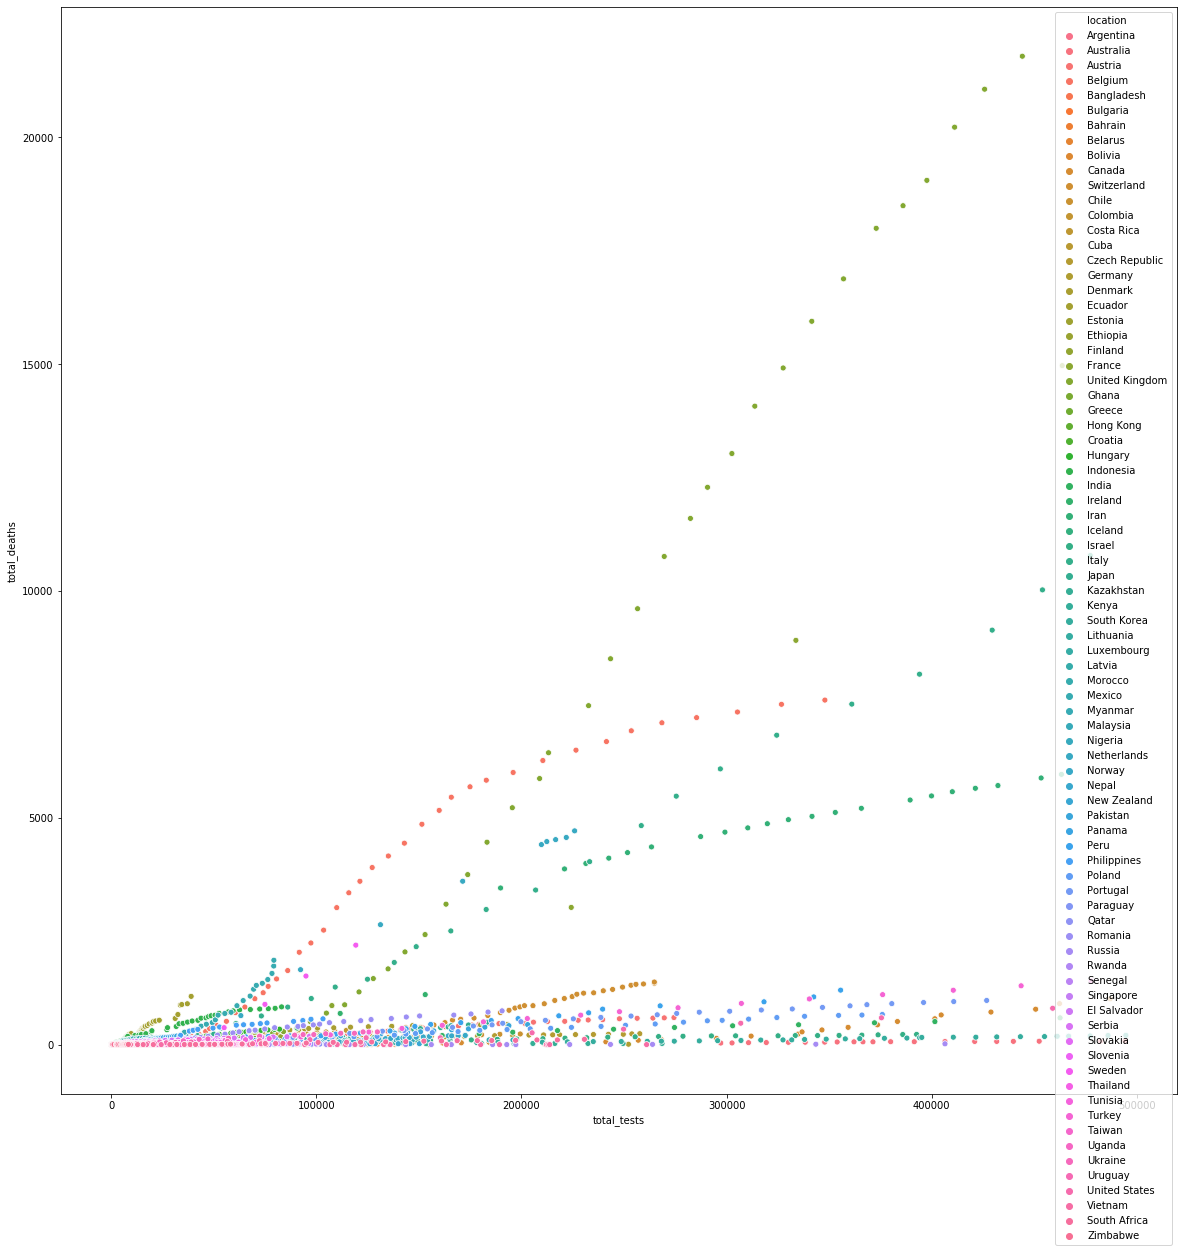

In [69]:
plt.figure(figsize=(20,20))
g =sns.scatterplot(x="total_tests", y="total_deaths",
              hue="location",
              data=tests_df[tests_df['total_tests'] < 500000]);

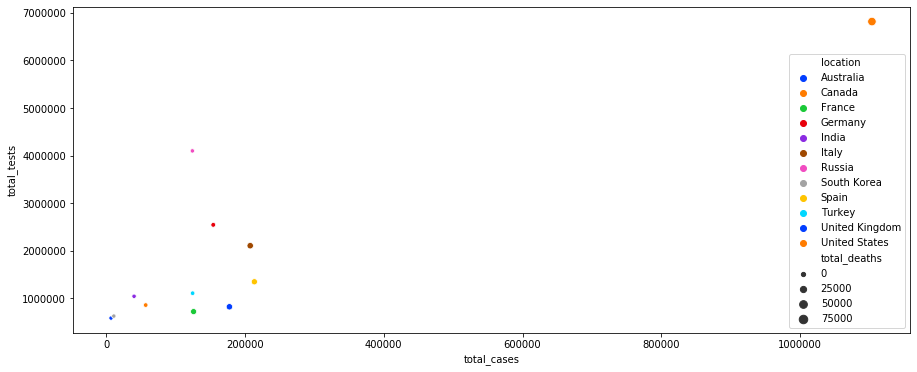

In [98]:
plt.figure(figsize=(15,6))
g =sns.scatterplot(x="total_cases", y="total_tests",
              hue='location',
              data=max_df[max_df['total_tests'] > 500000], size = 'total_deaths', legend = 'brief', palette = 'bright');

In [105]:
plt.figure(figsize=(15,6))
g =sns.scatterplot(x="total_cases", y="total_tests",
              hue='location',
              data=tests_df[tests_df['location'] in ['Australia', 'Canada', 'France', 'Germany', 'India', 'Italy', 'Russia', 'South Korea', 'Spain', 'Turkey', 'United Kingdom', 'United States']], size = 'total_deaths', legend = 'brief', palette = 'bright');

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1080x432 with 0 Axes>

In [65]:
max_df = max_df.reset_index()
max_df.head()

,location,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,Argentina,ARG,2020-05-01,4415,344,218,18,97.686,7.611,4.823,0.398,58685.0,3047.0,1.298,0.067,tests performed
1,Australia,AUS,2020-05-01,6762,431,92,6,265.178,16.902,3.608,0.235,588868.0,25227.0,23.093,0.989,tests performed
2,Austria,AUT,2020-05-03,15558,1141,596,31,1727.438,126.688,66.175,3.442,274355.0,36327.0,30.462,4.033,tests performed
3,Bahrain,BHR,2020-05-03,3284,301,8,1,1929.968,176.894,4.702,0.588,143030.0,5334.0,84.057,3.135,units unclear
4,Bangladesh,BGD,2020-05-01,7667,641,168,15,46.554,3.892,1.020,0.091,70239.0,5573.0,0.426,0.034,samples tested


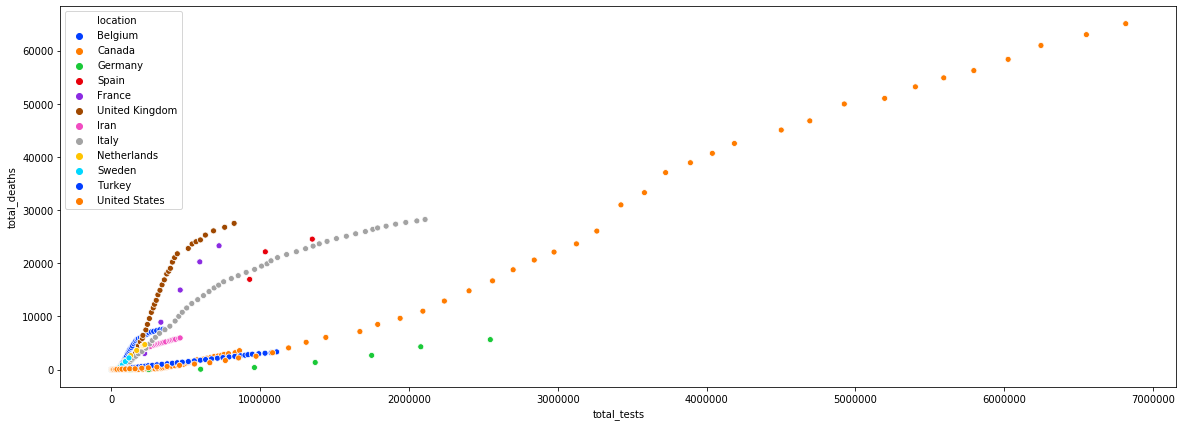

In [160]:
plt.figure(figsize=(20,7))
g =sns.scatterplot(x="total_tests", y="total_deaths", palette = 'bright',
              hue="location",
              data=tests_countries_df);

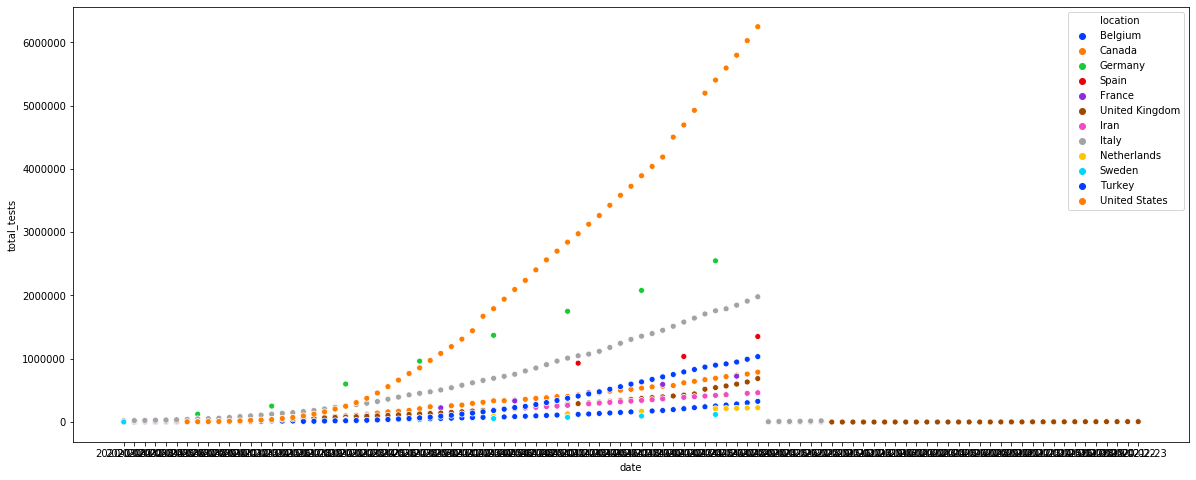

In [230]:
fig, ax = plt.subplots(figsize=(20,8))
# ax.set(yscale="log")
g =sns.scatterplot(x="date", y="total_tests", palette = 'bright',
              hue="location",
              data=tests_countries_df[(tests_countries_df['date'] < '2020-05-01')]) #  & (tests_countries_df['location'] == 'Italy')])

In [181]:
tests_countries_df[(tests_countries_df['location'] == 'Germany') & (tests_countries_df['date'] == '2020-05-01')]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units


In [186]:
tests_countries_df[(tests_countries_df['location'] == 'Canada')]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
62,CAN,Canada,2020-03-18,569,145,8,4,15.076,3.842,0.212,0.106,53975.0,NaN,1.430,NaN,people tested
63,CAN,Canada,2020-03-19,690,121,9,1,18.282,3.206,0.238,0.026,54956.0,981.0,1.456,0.026,people tested
64,CAN,Canada,2020-03-20,846,156,10,1,22.415,4.133,0.265,0.026,76814.0,21858.0,2.035,0.579,people tested
65,CAN,Canada,2020-03-21,971,125,12,2,25.727,3.312,0.318,0.053,88883.0,12069.0,2.355,0.320,people tested
66,CAN,Canada,2020-03-22,1302,331,18,6,34.497,8.770,0.477,0.159,98824.0,9941.0,2.618,0.263,people tested
67,CAN,Canada,2020-03-23,1430,128,20,2,37.889,3.391,0.530,0.053,107147.0,8323.0,2.839,0.221,people tested
68,CAN,Canada,2020-03-24,1646,216,24,4,43.612,5.723,0.636,0.106,125062.0,17915.0,3.314,0.475,people tested
69,CAN,Canada,2020-03-25,1959,313,27,3,51.905,8.293,0.715,0.079,142154.0,17092.0,3.766,0.453,people tested
70,CAN,Canada,2020-03-26,3385,1426,35,8,89.688,37.783,0.927,0.212,161603.0,19449.0,4.282,0.515,people tested
71,CAN,Canada,2020-03-27,4018,633,39,4,106.459,16.772,1.033,0.106,170644.0,9041.0,4.521,0.240,people tested
